<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Einführung-in-die-Case-Study" data-toc-modified-id="Einführung-in-die-Case-Study-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Einführung in die Case Study</a></span></li><li><span><a href="#Vorbereitung-und-deskriptive-Analyse" data-toc-modified-id="Vorbereitung-und-deskriptive-Analyse-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Vorbereitung und deskriptive Analyse</a></span></li><li><span><a href="#Korrelationsanalyse" data-toc-modified-id="Korrelationsanalyse-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Korrelationsanalyse</a></span></li><li><span><a href="#Regressionsanalyse" data-toc-modified-id="Regressionsanalyse-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Regressionsanalyse</a></span><ul class="toc-item"><li><span><a href="#Modell-und-Resultate" data-toc-modified-id="Modell-und-Resultate-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Modell und Resultate</a></span></li><li><span><a href="#Grafische-Residuen-Analyse" data-toc-modified-id="Grafische-Residuen-Analyse-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Grafische Residuen-Analyse</a></span></li><li><span><a href="#Grafische-Darstellung" data-toc-modified-id="Grafische-Darstellung-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Grafische Darstellung</a></span></li><li><span><a href="#Schlussfolgerungen" data-toc-modified-id="Schlussfolgerungen-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Schlussfolgerungen</a></span></li></ul></li><li><span><a href="#Analyse-der-Struktur-der-Süßwaren-auf-Basis-der-Häufigkeitsverteilung" data-toc-modified-id="Analyse-der-Struktur-der-Süßwaren-auf-Basis-der-Häufigkeitsverteilung-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analyse der Struktur der Süßwaren auf Basis der Häufigkeitsverteilung</a></span></li><li><span><a href="#Vorschlag-neuer-Süßware-(Eigenmarke)" data-toc-modified-id="Vorschlag-neuer-Süßware-(Eigenmarke)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Vorschlag neuer Süßware (Eigenmarke)</a></span></li><li><span><a href="#Vergleich-der-Zuckeranteile" data-toc-modified-id="Vergleich-der-Zuckeranteile-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Vergleich der Zuckeranteile</a></span></li><li><span><a href="#Zusatz" data-toc-modified-id="Zusatz-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Zusatz</a></span></li></ul></div>

# Einführung in die Case Study

Ziel dieser Case-Study ist es, die Beliebtheit der am Markt erhältlichen Süßwaren hinsichtlich spezieller Charakterstika zu untersuchen. Dabei sollen die Auswirkungen der Charakteristika hinstilich Beliebheit analysiert werden um aufbauend darauf Handlungsempfehlungen für die Erweiterung des Süßwarensortiments zu entwickeln.

Der Datensatz wird [hier](https://github.com/fivethirtyeight/data/tree/master/candy-power-ranking) zur Verfügung gestellt.

Die Story hinter diesen Daten kann [hier](http://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking)
gefunden werden

Der vorleigende Datensatz enthält Informationen über die Beliebtheit und Charaktersitika von Süßigkeiten zu Halloween im US-Amerikanischen Markt. Daher lassen sich nur bedingt Rückschlüsse für ein ganzjähriges Einzelhandelsgeschäft in Deutschland ziehen. 
Daher gilt folgende Annahme: Der Datensatz eignet sich für die nachfolgende Analyse und enthält kein BIAS aufgrund der Halloween spefizischen Umfrage im US-Amerikanischen Markt.  

candy-data.csv includes attributes for each candy along with its ranking. For binary variables, 1 means yes, 0 means no

    chocolate | Does it contain chocolate?
    fruity | Is it fruit flavored?
    caramel | Is there caramel in the candy?
    peanutalmondy | Does it contain peanuts, peanut butter or almonds?
    nougat | Does it contain nougat?
    crispedricewafer | Does it contain crisped rice, wafers, or a cookie component?
    hard | Is it a hard candy?
    bar | Is it a candy bar?
    pluribus | Is it one of many candies in a bag or box?
    sugarpercent | The percentile of sugar it falls under within the data set.
    pricepercent | The unit price percentile compared to the rest of the set.
    winpercent | The overall win percentage according to 269,000 matchups.

Zum besseren Verständnis des Datensatzes werden nachfolgend einige simple deskriptive Analysen durchgeführt.

# Vorbereitung und deskriptive Analyse 
Zunächst erfolgt die Einbindung der benötigten Bibliotheken, sowie das Einlesen des Datensatzes:

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


candy = pd.read_csv("candy-data.csv")
#candy.sort_values(by="pricepercent", ascending=True).head()

In [24]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [3]:
candy.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [4]:
print("Top 3:")
print(candy.sort_values(by="winpercent", ascending=False).head(3))
print("\n Flop3:")
print(candy.sort_values(by="winpercent").head(3))

Top 3:
               competitorname  chocolate  fruity  caramel  peanutyalmondy  \
52  ReeseÕs Peanut Butter cup          1       0        0               1   
51         ReeseÕs Miniatures          1       0        0               1   
79                       Twix          1       0        1               0   

    nougat  crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
52       0                 0     0    0         0         0.720         0.651   
51       0                 0     0    0         0         0.034         0.279   
79       0                 1     0    1         0         0.546         0.906   

    winpercent  
52   84.180290  
51   81.866257  
79   81.642914  

 Flop3:
        competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
44           Nik L Nip          0       1        0               0       0   
7   Boston Baked Beans          0       0        0               1       0   
12            Chiclets          0       1       

Eine Bereinigung des Datensatzes ist an dieser Stelle nicht nötig, da die Daten schon in bereinigter Form vorliegen.

Zu erkennen war weiterhin, dass die Variablen `sugarpercent`, `pricepercent` und `winpercent` in metrischer Form vorliegen, während alle anderen Variablen als kategoriale Variablen in dichotomer Form dargestellt sind (binärcodiert, siehe dazu auch Dummykodierung)

Im nächsten Schritt werden die metrischen und binaärcordierten Variablen für nachvolgende Analysen in seperaten Listen gespeichert. Weiterhin wird ein DataFrame mit allen unabhängigen Variablen (`candy_ratio`) sowie ein DataFrame mit der abhängigen Variable (`candy_target`) erstellt.
Da der Einfluss von verschiedenen Charaktersitika auf die Beliebtheit analysiert werden soll, stellt die Spalte `winpercent` die abhängige Variable dar. 

In [62]:
cols_ratio = ["sugarpercent", "pricepercent"]
cols_ratio_bin = ["chocolate", "fruity", "caramel", "peanutyalmondy", "nougat", "crispedricewafer", "hard", "bar", "pluribus"]
cols_target = ["winpercent"]

candy_ratio = candy.loc[:,cols_ratio + cols_ratio_bin]
candy_target = candy.loc[:,cols_target]


Für die metrisch skalierten Variablen eignet sich die Darstellung als scatterplot um einen ersten Eindruck zu erlangen 
und eventuelle linearen oder sonstige Zusammenhänge erkennen zu können.

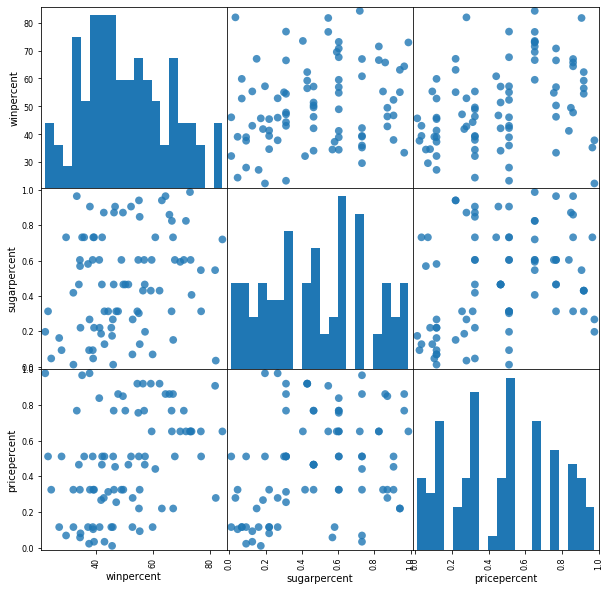

In [6]:
grr = pd.plotting.scatter_matrix(candy[cols_target + cols_ratio]
                                 ,figsize=(10, 10)
                                 ,marker = 'o'
                                 ,hist_kwds={'bins' : 20}
                                 ,s = 60
                                 ,alpha = 0.8)
plt.show()

Anhand des scatterplots lassen sich keine linearen oder sonstigen Zusammenhänge zwischen `winpercent` und `pricepercent` oder `sugarpercent` erkennen.

# Korrelationsanalyse
Zum weiteren Verständnis des Einflusses der Charakteristika auf die Beliebtheit folgt zunächst eine Korrelationsanalyse:

In [7]:
from scipy.stats import pearsonr
liste = ["pricepercent","sugarpercent","chocolate", "fruity", "caramel", "peanutyalmondy", "nougat", "crispedricewafer", "hard", "bar", "pluribus"]
X = candy_ratio[liste]
y = candy["winpercent"]

corr_count = {}
for index in liste:
    corr, p = pearsonr(y, X[index])
    corr_count[index]=corr

keys_sort = sorted(corr_count, key=corr_count.get, reverse=True)  

i=0    
for i in keys_sort:
    print("Korrelationskoeffizient", i, "~winpercent")
    print(corr_count[i],"\n")

Korrelationskoeffizient chocolate ~winpercent
0.6365167485397069 

Korrelationskoeffizient bar ~winpercent
0.42992932818934865 

Korrelationskoeffizient peanutyalmondy ~winpercent
0.40619220218098284 

Korrelationskoeffizient pricepercent ~winpercent
0.3453254099676849 

Korrelationskoeffizient crispedricewafer ~winpercent
0.32467965137668436 

Korrelationskoeffizient sugarpercent ~winpercent
0.22915065712800656 

Korrelationskoeffizient caramel ~winpercent
0.21341629556767977 

Korrelationskoeffizient nougat ~winpercent
0.1993752988015668 

Korrelationskoeffizient pluribus ~winpercent
-0.24744786760290396 

Korrelationskoeffizient hard ~winpercent
-0.31038157535722827 

Korrelationskoeffizient fruity ~winpercent
-0.38093813706014334 



Grafische Darstellung der Korrelationsanalyse:

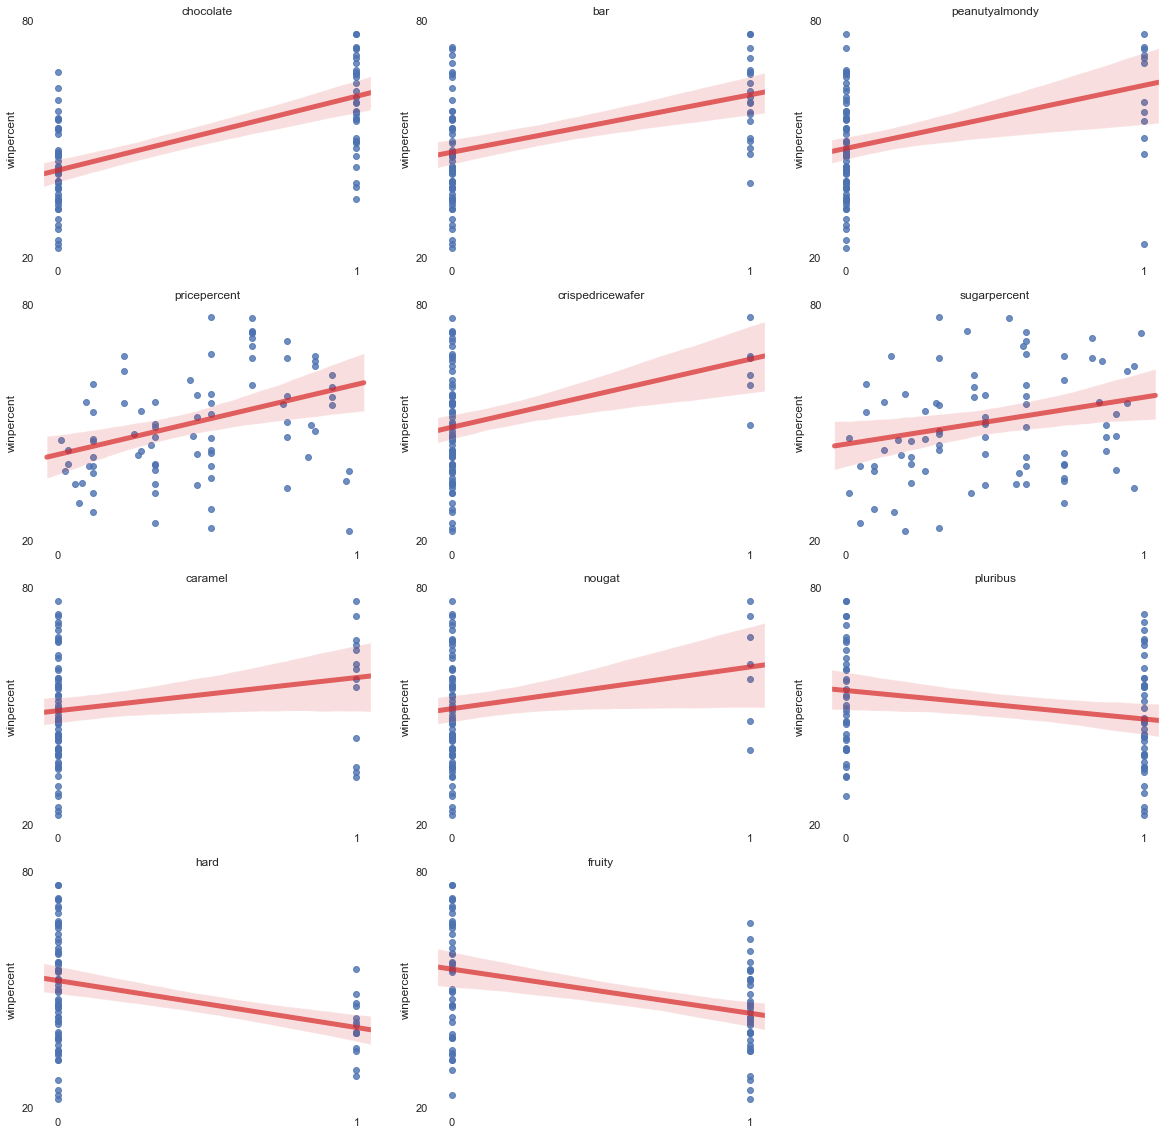

In [42]:
fig = plt.figure(figsize=(20,20))

for i in range(11):
    ax = fig.add_subplot(4,3,i+1)
    #ax.scatter(X[keys_sort[i]], y, color = 'tab:blue') 
    sns.regplot(x=X[[keys_sort[i]]], y=y, line_kws={"color":"tab:red","alpha":0.7,"lw":5})
    ax.set(title=keys_sort[i])
    ax.set_yticks([20,80])
    ax.set_xticks([0,1])
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(20,80)
    ax.tick_params(bottom=False ,top=False, left=False, right=False)
    if (i==0 or i==3 or i==6 or i==9):
        ax.set(ylabel="winpercent")        
plt.show()


# Regressionsanalyse
## Modell und Resultate
Im nächsten Schritt erfolgt die multivariate Regressionsanalyse (OLS).
Warum Regression? Erlaubt die Analyse welche Merkmale sich auf welche Weise auf die abhängige Variable auswirkt

In [17]:
X = candy_ratio
#[["sugarpercent","chocolate", "fruity", "caramel", "peanutyalmondy", "nougat", "crispedricewafer", "hard", "bar", "pluribus","pricepercent"]]
X = sm.add_constant(X)
y = candy["winpercent"]

model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     7.797
Date:                Mon, 04 Nov 2019   Prob (F-statistic):           9.50e-09
Time:                        01:45:02   Log-Likelihood:                -315.64
No. Observations:                  85   AIC:                             655.3
Df Residuals:                      73   BIC:                             684.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               34.5340      4.320  

C:\Users\Work\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Anhand der Resultate können für die 3 Charakteristika `chocolate`, `peanutyalmondy` und `fruity` ein positiver Einfluss auf die Beliebtheit mit statisischer Signifikanz (mit alpha=0.05) unterstellt werden.


## Grafische Residuen-Analyse

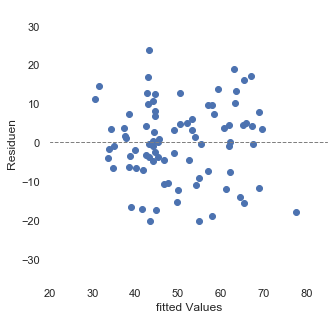

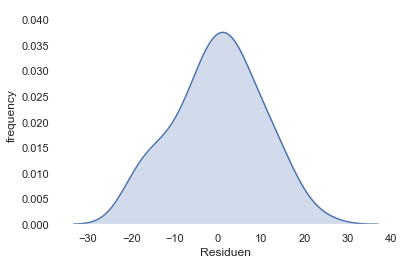

In [16]:
residuals = sm.OLS(y,X).fit().resid
fitted_values = model.fittedvalues
f, ax = plt.subplots(figsize=(5,5))
plt.scatter(fitted_values, residuals) 
plt.hlines(0,20,85, color="grey", linestyle="dashed", linewidth=1)
ax.set_ylim(-35,35)
ax.set(ylabel="Residuen", xlabel="fitted Values") 
ax.set_xlim(20,85)
plt.show()
sns.distplot(residuals,hist= True, color = "b",kde_kws={"shade": True}, hist_kws=dict(alpha=0))
plt.xlabel("Residuen")
plt.ylabel("frequency")
plt.show()

## Grafische Darstellung

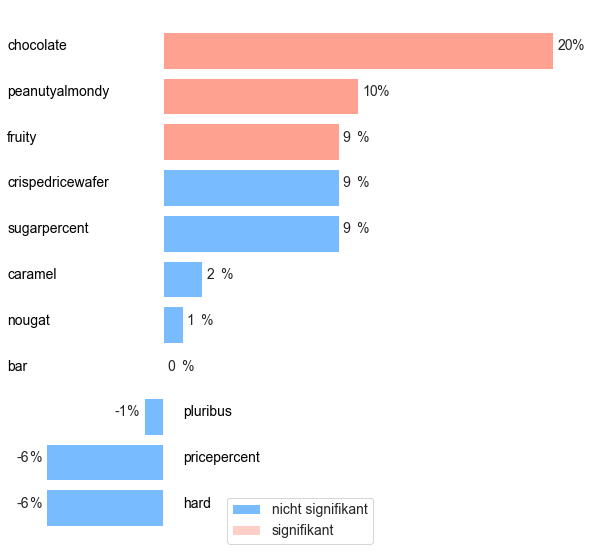

In [11]:
sns.set_style(style="white", rc=None)


see_names = 1 #set = 1 for visible labels, 0 for invisible
fig, ax = plt.subplots(figsize=(10,10))
names = ["hard", "pricepercent", "pluribus", "bar", "nougat", "caramel", "sugarpercent", "crispedricewafer", "fruity", "peanutyalmondy", "chocolate"]

size = [round(-6.1653), round(-5.9284), round(-0.8545), round(0.4415),round(0.8043), round(2.2245),round(8.9190),round(9.0868), round(9.4223),round(10.0707),round(19.7481)]
plt.barh(names, size, color = ((0.1176,0.5647,1,0.6),(0.1176,0.5647,1,0.6),(0.1176,0.5647,1,0.6),(0.1176,0.5647,1,0.6),(0.1176,0.5647,1,0.6),(0.1176,0.5647,1,0.6),(0.1176,0.5647,1,0.6),(0.1176,0.5647,1,0.6),(1,0.3882,0.2784,0.6),(1,0.3882,0.2784,0.6),(1,0.3882,0.2784,0.6)), label="nicht signifikant")
ax.tick_params(bottom=False, left=False, top=False, right=False)
plt.barh(0,0, color=(1,0.3882,0.2784,0.3), label="signifikant")
for key, spine in ax.spines.items():
    spine.set_visible(False)
    
#ax.set_title("Erwarteter Beliebtheitszuwachs per Charaktersitika", fontsize=18) 
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for i in range(3):
    if see_names == 1:
        ax.text(1,i,names[i],fontsize=14,color="black")
    ax.text(size[i]-1.5,i,size[i], fontsize=14,)
    ax.text(size[i]-0.9,i,"%", fontsize=14,)

for i in range(3,11):
    if see_names == 1:
        ax.text(-8,i,names[i],fontsize=14,color="black")
    ax.text(size[i]+0.2,i,size[i], fontsize=14,)
    ax.text(size[i]+0.9,i,"%", fontsize=14,)

ax.legend(fontsize=14, loc="lower center")
plt.savefig('barchart2.pdf', transparent=True)
plt.savefig('barchart2.png', transparent=True)
plt.show()


## Schlussfolgerungen

Die Charakteristika `chocolate`, `fruity` und `peanutyalmondy` weisen einen statitisch signifikanten(alpha=0.05) Einfluss auf die Beliebtheit von Süßwaren aus.

Durch den Einsatz der Charakteristika `chocolate` lässt sich Beliebtheitssteigerung von ca.20% erwarten (`fruity`/`peanutyalmondy` -> 9%/10%).


Damit weisen lediglich inhaltliche Charakteristika einen signifikanten Einfluss auf die Beliebtheit der Süßware auf.
Da jedoch auch (mind.) eine strukturgebende Charakteristika (`bar`,`hard`,`pluribus`) benötigt wird, wird sich nachfolgend zusätzlich auf Basis der Häufigkeitsverteilung für eine strukturgebende Charakteristika entschieden.

# Analyse der Struktur der Süßwaren auf Basis der Häufigkeitsverteilung

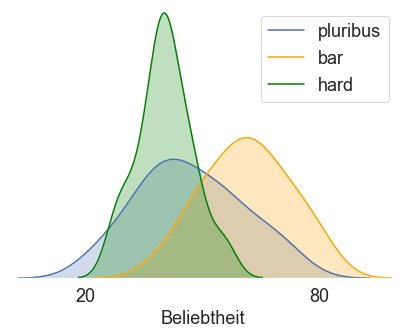

In [12]:
sns.set(rc={'axes.facecolor':(1,1,1,0), 'figure.facecolor':(1,1,1,0)})

candy5 = candy[candy["bar"]==1]
candy6 = candy[candy["pluribus"]==1]
candy7 = candy[candy["hard"]==1]
fig, ax = plt.subplots(figsize=(7,5))


ax1 = sns.distplot(candy6["winpercent"], label="pluribus",hist=False, color = "b",kde_kws={"shade": True}, hist_kws=dict(alpha=0))
ax2 = sns.distplot(candy5["winpercent"], label="bar",hist=False, color = "orange", kde_kws={"shade": True}, hist_kws=dict(alpha=0))
ax3 = sns.distplot(candy7["winpercent"], label="hard",hist=False, color = "green", kde_kws={"shade": True}, hist_kws=dict(alpha=0))
plt.tick_params(bottom=False, left=False, top=False, right=False)

ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
#ax1.spines["buttom"].set_visible(False)
plt.ylim(0,0.06)
plt.xlim(0,100)
plt.xlabel("Beliebtheit", fontsize=18)
plt.xticks([20,80],fontsize=18)
plt.yticks([])
#plt.title("Histogram zur Analyse der äußeren Erscheinung der Süßware", fontsize=18) 
plt.legend(fontsize=18, facecolor=(1,1,1,0.3))
#plt.tight_layout()

plt.savefig('histogram.pdf')
plt.savefig('histogram.png',tranparent=True)
plt.show()

Aufgrund der vorliegenden Darstellung scheint die strukturgebende Charaktersitka `bar` besonders erfolgsversprechend.

# Vorschlag neuer Süßware (Eigenmarke)

Eigenmarken orientieren sich i.d.R. an bekannten Herstellermarken. Deshalb muss bei der Einführung einer neuen Süßigkeit beachtet werden, dass sich möglichst keine ähnliche Eigen- oder Herstellermarke bereits im Sortiment befindet.

Auf Basis der zuvor erarbeiteten Erkenntnisse wird nachfolgend ein Vorschlag für eine neue Süßware im Eigenwarensortiment präsentiert.

Die neue Süßware orientiert sich dabei an dem Erdnussriegel der Herstellermarke [Mr.Tom](https://www.hosta-group.com/produkt/mrtom/).
Zusätzlich dazu ist eine Erdnussriegelvariante mit Schokoladenüberzeug vielversprechend. Dabei kann sich an der Herstellermarke [Mr.Jim](https://www.hosta-group.com/produkt/mrjim/) orientiert werden.


# Vergleich der Zuckeranteile 

Damit die neue Süßware erfolgreich in die Lild Zucker-Reduktionskampange integriert werden kann, werden nachfolgend (auf Basis des Datensatzes) die Zuckeranteile der Süßwaren miteinander verglichen. Zur Orientierung der Zuckeranteile der neu einzuführenden Süßware, können den Daten der als Vorbild dienenden Herstellermarken benutzt werden ([Mr.Tom](https://www.hosta-group.com/produkt/mrtom/)/[Mr.Jim](https://www.hosta-group.com/produkt/mrjim/)) 

mean sugarpercent for bars: 0.5277142742857143
mean sugarpercent overall : 0.4786470514588237


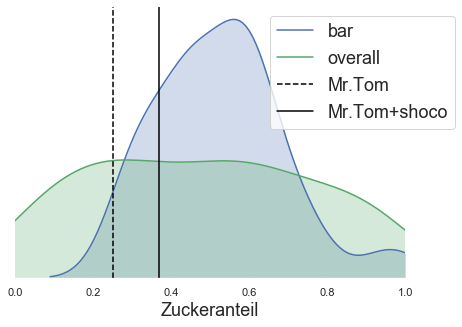

In [18]:
#sns.set(rc={'axes.facecolor':(1,1,1,0), 'figure.facecolor':(1,1,1,0)})

bars = candy[candy["bar"]==1]

print("mean sugarpercent for bars:", bars["sugarpercent"].mean())
print("mean sugarpercent overall :", candy["sugarpercent"].mean())
fig, ax = plt.subplots(figsize=(7,5))

ax1 = sns.distplot(bars["sugarpercent"], label="bar",hist=False, color = "b",kde_kws={"shade": True}, hist_kws=dict(alpha=0))
#ax11 = sns.distplot(bars["sugarpercent"], hist=True, kde=True)
ax2 = sns.distplot(candy["sugarpercent"], label="overall",hist=False, color = "g",kde_kws={"shade": True}, hist_kws=dict(alpha=0))
#ax22 = sns.distplot(candy["sugarpercent"], hist=True, kde=True)
ax3 = plt.axvline(0.25, color="black", linestyle="dashed", label="Mr.Tom")
ax4 = plt.axvline(0.37, color="black", linestyle="solid", label="Mr.Tom+shoco")
plt.tick_params(bottom=False, left=False, top=False, right=False)

ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
#ax1.spines["buttom"].set_visible(False)
#plt.ylim(0,0.06)
plt.xlim(0,1)
plt.xlabel("Zuckeranteil", fontsize=18)
#plt.xticks([20,80],fontsize=18)
plt.yticks([])
#plt.title("Histogram zur Analyse der äußeren Erscheinung der Süßware", fontsize=18) 
ax.legend(fontsize=18, facecolor=(1,1,1,0.3), bbox_to_anchor=(0, 0, 1.15, 1),ncol=1)
#plt.tight_layout()

plt.savefig('histogram_bar_sugar.pdf')
plt.savefig('histogram_bar_sugar.png',tranparent=True)
plt.show()


In [25]:
candy[candy["peanutyalmondy"]==1]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
32,Peanut butter M&MÕs,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050
40,Mr Good Bar,1,0,0,1,0,0,0,1,0,0.313,0.918,54.526451
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641
46,Payday,0,0,0,1,1,0,0,1,0,0.465,0.767,46.296597
47,Peanut M&Ms,1,0,0,1,0,0,0,0,1,0.593,0.651,69.483788
51,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
52,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290


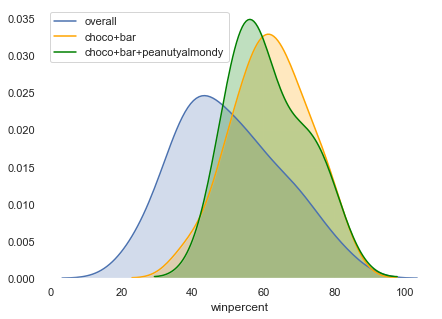

In [36]:
candy_choco = candy[candy["chocolate"]==1]
candy_choco_bar = candy_choco[candy_choco["bar"]==1]
candy_choco_bar_peanut = candy_choco_bar[candy_choco_bar["peanutyalmondy"]==1]

fig, ax = plt.subplots(figsize=(7,5))

ax1 = sns.distplot(candy["winpercent"], label="overall",hist=False, color = "b",kde_kws={"shade": True}, hist_kws=dict(alpha=0))
ax2 = sns.distplot(candy_choco_bar["winpercent"], label="choco+bar",hist=False, color = "orange", kde_kws={"shade": True}, hist_kws=dict(alpha=0))
ax2 = sns.distplot(candy_choco_bar_peanut["winpercent"], label="choco+bar+peanutyalmondy",hist=False, color = "green", kde_kws={"shade": True}, hist_kws=dict(alpha=0))


# Zusatz - Berücksichtigung von Interaktionseffekten

In [65]:
X_inter = 0
X_inter = candy_ratio
X_inter["choco_fruity"] = X_inter["chocolate"]*X_inter["fruity"] 
X_inter["choco_caramel"] = X_inter["chocolate"]*X_inter["caramel"]
X_inter["choco_peanutyalmondy"] = X_inter["chocolate"]*X_inter["peanutyalmondy"] 
X_inter["choco_nougat"] = X_inter["chocolate"]*X_inter["nougat"]
X_inter["choco_crispedricewafer"] = X_inter["chocolate"]*X_inter["crispedricewafer"] 
X_inter["choco_hard"] = X_inter["chocolate"]*X_inter["hard"] 
X_inter["choco_bar"] = X_inter["chocolate"]*X_inter["bar"] 
X_inter["choco_pluribus"] = X_inter["chocolate"]*X_inter["pluribus"] 

X_inter["fruity_caramel"] = X_inter["fruity"]*X_inter["caramel"]
X_inter["fruity_peanutyalmondy"] = X_inter["fruity"]*X_inter["peanutyalmondy"]
X_inter["fruity_nougat"] = X_inter["fruity"]*X_inter["nougat"]
X_inter["fruity_crispedricewafer"] = X_inter["fruity"]*X_inter["crispedricewafer"] 
X_inter["fruity_hard"] = X_inter["fruity"]*X_inter["hard"] 
X_inter["fruity_bar"] = X_inter["fruity"]*X_inter["bar"] 
X_inter["fruity_pluribus"] = X_inter["fruity"]*X_inter["pluribus"]

X_inter["peanutyalmondy_caramel"] = X_inter["peanutyalmondy"]*X_inter["caramel"]
X_inter["peanutyalmondy_nougat"] = X_inter["peanutyalmondy"]*X_inter["nougat"]
X_inter["peanutyalmondy_crispedricewafer"] = X_inter["peanutyalmondy"]*X_inter["crispedricewafer"] 
X_inter["peanutyalmondy_hard"] = X_inter["peanutyalmondy"]*X_inter["hard"] 
X_inter["peanutyalmondy_bar"] = X_inter["peanutyalmondy"]*X_inter["bar"] 
X_inter["peanutyalmondy_pluribus"] = X_inter["peanutyalmondy"]*X_inter["pluribus"] 

X_inter["caramel_nougat"] = X_inter["caramel"]*X_inter["nougat"]
X_inter["caramel_crispedricewafer"] = X_inter["caramel"]*X_inter["crispedricewafer"] 
X_inter["caramel_hard"] = X_inter["caramel"]*X_inter["hard"] 
X_inter["caramel_bar"] = X_inter["caramel"]*X_inter["bar"] 
X_inter["caramel_pluribus"] = X_inter["caramel"]*X_inter["pluribus"] 

X_inter["nougat_crispedricewafer"] = X_inter["nougat"]*X_inter["crispedricewafer"] 
X_inter["nougat_hard"] = X_inter["nougat"]*X_inter["hard"] 
X_inter["nougat_bar"] = X_inter["nougat"]*X_inter["bar"] 
X_inter["nougat_pluribus"] = X_inter["nougat"]*X_inter["pluribus"] 

X_inter["crispedricewafer_hard"] = X_inter["crispedricewafer"]*X_inter["hard"] 
X_inter["crispedricewafer_bar"] = X_inter["crispedricewafer"]*X_inter["bar"] 
X_inter["crispedricewafer_pluribus"] = X_inter["crispedricewafer"]*X_inter["pluribus"] 

X_inter["hard_bar"] = X_inter["hard"]*X_inter["bar"] 
X_inter["hard_pluribus"] = X_inter["hard"]*X_inter["pluribus"] 

X_inter["bar_pluribus"] = X_inter["bar"]*X_inter["pluribus"] 

X_inter["choco_bar_peanuty_carmel"] = X_inter["bar"]*X_inter["chocolate"]*X_inter["peanutyalmondy"]*X_inter["caramel"]


X_inter = sm.add_constant(X_inter)
y = candy["winpercent"]

model = sm.OLS(y,X_inter).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     4.495
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           8.19e-07
Time:                        14:46:31   Log-Likelihood:                -295.45
No. Observations:                  85   AIC:                             652.9
Df Residuals:                      54   BIC:                             728.6
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Das vorliegende Modell mit Interaktionseffekten ist nur bedingt zu interpretieren, da die Anzahl der Ausprägungen der einzelnen Interaktionsterme teilweise sehr gering sind. Ein signifikates Ergebnis (abgesehen von den nur noch bedingt interpretierbaren Haupteffekten) ist dennoch vorhanden.
Die Kombination von `chocolate` und `peanutyalmondy` scheint dabei erfolgsversprechend. 
Der in Kapitel 6 erarbeitete Vorschlag wird somit auch durch das Modell mit Interaktionseffekten verifiziert. 